# Market Basket Analysis



In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

In [3]:
#!pip install jupyterlab-rise


### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [6]:
#!pip install mlxtend
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy as nd
import pandas as pd

3- Loading Data

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [13]:
# write your code here
df=pd.read_excel('C:/Naveena/OLD Laptop Projects/Online Retail.xlsx')


C:\Users\haris\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\haris\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


4- Print out the first 10 rows of the DataFrame. 

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [15]:
# write your code here
df.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


5- Print out the data type for each column in the DataFrame. 

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [19]:
# write your code here
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications 

In [22]:
# write your code here
df.shape


(541909, 8)

In [24]:
Unique_invoices=(df['InvoiceNo'].unique())
print('Unique Invoices are:',Unique_invoices)
print('Number of Unique Invoices are:',len(Unique_invoices))



Unique Invoices are: [536365 536366 536367 ... 581585 581586 581587]
Number of Unique Invoices are: 25900


In [26]:
Unique_customers=(df['CustomerID'].unique())
print('Unique Customers are:',Unique_customers)
print('Number of Unique Customers are:',len(Unique_customers))


Unique Customers are: [17850. 13047. 12583. ... 13298. 14569. 12713.]
Number of Unique Customers are: 4373


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent"

In [29]:
# write your code here
df['IsCPresent']=[1 if str(InvoiceNo).startswith('C') else 0 for InvoiceNo in df['InvoiceNo']]
print(df['IsCPresent'].value_counts())

IsCPresent
0    532621
1      9288
Name: count, dtype: int64


b.
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [32]:
# write your code here
df1=df[df['Quantity']>0]
df1=df1.drop(df1[df1['IsCPresent']==1].index)
df2=df1[['InvoiceNo','Description']]


In [34]:
df2.isnull().sum()

InvoiceNo        0
Description    592
dtype: int64

In [36]:
online1=df2.drop(df2[df2['Description'].isnull()].index)
#df2.rename_axis('online2')
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [38]:
online1.isnull().sum()

InvoiceNo      0
Description    0
dtype: int64

c. Approximately, how many rows and invoice numbers have already removed? 

#### Initially, there were 5,41,909 rows in the original dataset.In step b ,  the length of the dataset was 532621 after we have deleted 9288 rows where the InvoiceNo started with 'C'.After the data set is filtered out of return transactions the length is 531285. From this,We have also deleted 592 rows with NaN values in 'Description' columnn.The dataset should be having 530693 rows approximately.


In [41]:
#write your code here to prove your answer:
online1.shape

(530693, 2)

d. 
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [44]:
# write your code here

Invoice_Nos=online1['InvoiceNo'].tolist()
print(len(Invoice_Nos))
unique_Invs=list(set(Invoice_Nos))
print('Numner of Unique Invoice Nos is',len(unique_Invs))


530693
Numner of Unique Invoice Nos is 20136


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000

In [47]:
# write your code here
New_InvNo=unique_Invs[0:5000]
print(len(New_InvNo))

5000


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1

In [50]:
# write your code here
online1=online1[online1['InvoiceNo'].isin(New_InvNo)]
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful 

In [53]:
# write your code here
online1.shape

(133315, 2)

In [55]:
print(len(online1['InvoiceNo'].unique()))
# or print(online1['InvoiceNo'].nunique()) 

5000


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list

In [58]:
# write your code here
invoice_item_list=[online1.loc[online1['InvoiceNo']==item,'Description'].tolist() for item in unique_Invs]
for sublist in invoice_item_list[:4]:
    print(sublist)

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']
['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']


8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. 

In [61]:
# write your code here
from mlxtend.preprocessing import TransactionEncoder
transaction_encoder=TransactionEncoder()
data=transaction_encoder.fit_transform(invoice_item_list)
print(data)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values 

In [64]:
# write your code here
online_encoder_df=pd.DataFrame(data,columns=transaction_encoder.columns_)
# Define a subset
subset=online_encoder_df[(online_encoder_df==True).any(axis=1) & (online_encoder_df==False).any(axis=1)]
#print(subset) # Here, each row has at least one true and one false. Therefore, all rows are printed.
subset.head(10)

,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,amazon sales,found,rcvd be air temp fix for dotcom sit,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [152]:
subset.columns

Index([' 4 PURPLE FLOCK DINNER CANDLES', ' OVAL WALL MIRROR DIAMANTE ',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' SPACEBOY BABY GIFT SET',
       '*Boombox Ipod Classic', '*USB Office Mirror Ball',
       '10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 DAISY PEGS IN WOOD BOX', '12 EGG HOUSE PAINTED WOOD',
       ...
       'ZINC HEART LATTICE T-LIGHT HOLDER', 'ZINC HEART LATTICE TRAY OVAL ',
       'ZINC METAL HEART DECORATION', 'ZINC TOP  2 DOOR WOODEN SHELF ',
       'ZINC WILLIE WINKIE  CANDLE STICK', 'amazon', 'amazon sales', 'found',
       'rcvd be air temp fix for dotcom sit', 'wrongly sold (22719) barcode'],
      dtype='object', length=3135)

c. Print out the dimensions of the encoded DataFrame. 

In [154]:
subset.shape

(5000, 3135)

This is becase there are 5000 unique invoices and 3150 descriptions

#### The data is now prepared for modeling.
---

## Applying Apriori's Model

In [199]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm with a minimum support threshold
frequent_itemsets = apriori(subset, min_support=0.04, use_colnames=True)


In [201]:
# Generate association rules with a minimum lift threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the first few rules
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.0574,0.0574,0.0428,0.745645,12.990324,1.0,0.039505,3.705838,0.979227,0.594444,0.730156,0.745645
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.0574,0.0574,0.0428,0.745645,12.990324,1.0,0.039505,3.705838,0.979227,0.594444,0.730156,0.745645
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.0676,0.0890,0.0426,0.630178,7.080646,1.0,0.036584,2.463344,0.921032,0.373684,0.594048,0.554415
3,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.0734,0.1050,0.0474,0.645777,6.150253,1.0,0.039693,2.526654,0.903740,0.361832,0.604220,0.548603


In [203]:
# Sort the DataFrame by 'support', 'confidence', and 'lift' in descending order
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Display the sorted DataFrame
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.0428,0.745645,12.990324
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.0428,0.745645,12.990324
2,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.0426,0.630178,7.080646
3,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.0474,0.645777,6.150253


Key Observations:

The association rules reveal strong relationships between products. For example, the "ROSES REGENCY TEACUP AND SAUCER" and "GREEN REGENCY TEACUP AND SAUCER" have a high lift of 12.99, indicating that these items are frequently purchased together. Similarly, the "HEART OF WICKER LARGE" and "HEART OF WICKER SMALL" are often bought together, with a confidence of 63.02%, suggesting customers prefer different sizes of the same product. Additionally, the rule between the "SET OF 6 SPICE TINS PANTRY DESIGN" and "SET OF 3 CAKE TINS PANTRY DESIGN" shows a lift of 6.15, implying that these products are commonly bought together. These findings suggest opportunities for cross-selling and bundling related products.




## Validation of Results from Apriori's Algorithm

In [225]:
import pandas as pd
from scipy.stats import chi2_contingency

# Loop through all rules in rules_sorted and check each rule's Chi-Square results
for index, row in rules_sorted.iterrows():
    antecedent = list(row['antecedents'])[0]  # Extract item from antecedent (product name)
    consequent = list(row['consequents'])[0]  # Extract item from consequent (product name)

    # Create the contingency table from df using the product names (antecedent and consequent)
    contingency_table = pd.crosstab(subset[antecedent], subset[consequent])

    # Perform the Chi-Square Test of Independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Output the results for this rule
    print(f"Rule: {antecedent} -> {consequent}")
    print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p_value}")
    print("-" * 50)

    # Interpretation of the p-value
    if p_value < 0.05:
        print("Result: The association is statistically significant.")
    else:
        print("Result: The association is not statistically significant.")
    print("\n")


Rule: ROSES REGENCY TEACUP AND SAUCER  -> GREEN REGENCY TEACUP AND SAUCER
Chi-Square Test: chi2 = 2652.1574465247077, p-value = 0.0
--------------------------------------------------
Result: The association is statistically significant.


Rule: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER 
Chi-Square Test: chi2 = 2652.1574465247077, p-value = 0.0
--------------------------------------------------
Result: The association is statistically significant.


Rule: HEART OF WICKER LARGE -> HEART OF WICKER SMALL
Chi-Square Test: chi2 = 1302.2909754824593, p-value = 3.5922037057288394e-285
--------------------------------------------------
Result: The association is statistically significant.


Rule: SET OF 6 SPICE TINS PANTRY DESIGN -> SET OF 3 CAKE TINS PANTRY DESIGN 
Chi-Square Test: chi2 = 1226.3265588724594, p-value = 1.1583900169384364e-268
--------------------------------------------------
Result: The association is statistically significant.




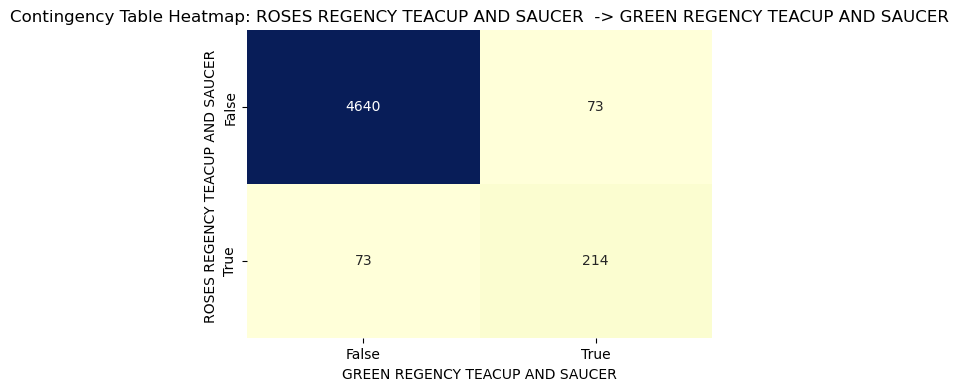

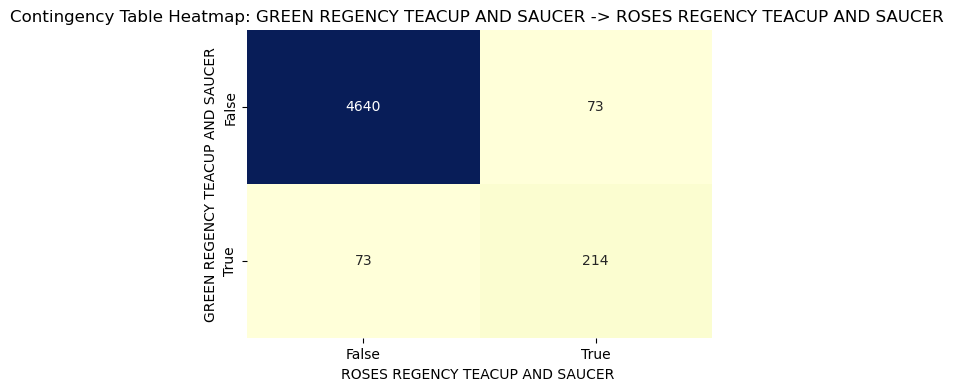

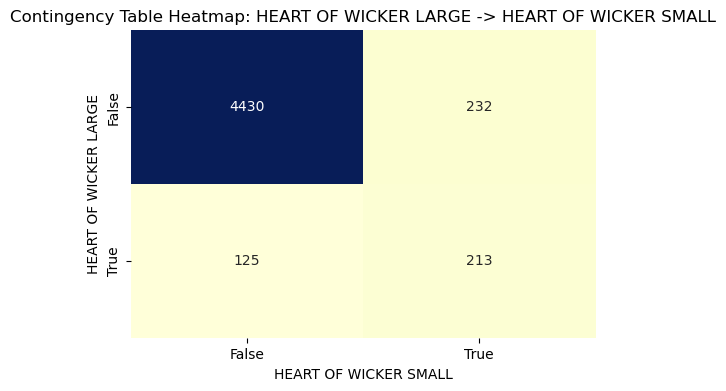

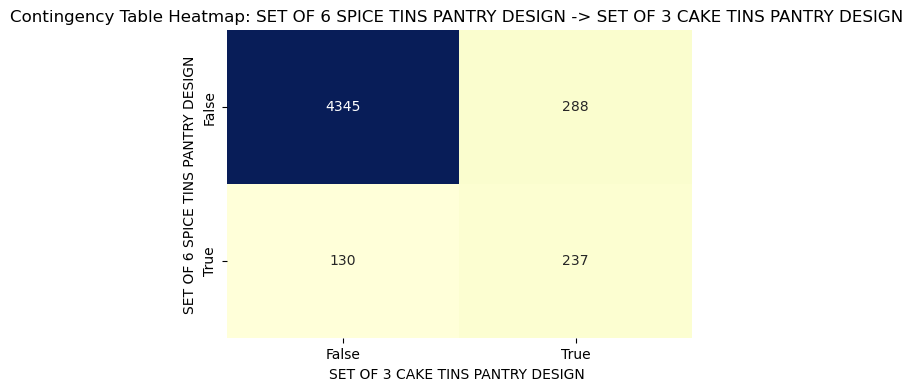

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `rules_sorted` has the 'antecedents' and 'consequents' columns
for index, row in rules_sorted.iterrows():
    antecedent = list(row['antecedents'])[0]  
    consequent = list(row['consequents'])[0]     
    # Create the contingency table for this rule
    contingency_table = pd.crosstab(subset[antecedent], subset[consequent])
    
    # Plotting the heatmap for this rule
    plt.figure(figsize=(6, 4))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", cbar=False, fmt="d")
    plt.title(f"Contingency Table Heatmap: {antecedent} -> {consequent}")
    plt.xlabel(consequent)
    plt.ylabel(antecedent)
    plt.show()


In [241]:
# Strip spaces from column names
subset.columns = subset.columns.str.strip()

# Now try accessing the column again
support_antecedent = subset['ROSES REGENCY TEACUP AND SAUCER'].sum()
support_consequent = subset['GREEN REGENCY TEACUP AND SAUCER'].sum()

print(f"Support for ROSES REGENCY TEACUP AND SAUCER: {support_antecedent}")
print(f"Support for GREEN REGENCY TEACUP AND SAUCER: {support_consequent}")



Support for ROSES REGENCY TEACUP AND SAUCER: 287
Support for GREEN REGENCY TEACUP AND SAUCER: 287


Products Co-Occurrence Ratio: "ROSES REGENCY TEACUP AND SAUCER" and "GREEN REGENCY TEACUP AND SAUCER"
The ratio of how often these two products appeared together relative to their total appearances is calculated by dividing the times they appeared together (237) by the total number of appearances (574), yielding a ratio of approximately 0.41 or 41.1%. This means that 41% of the time, these two products appeared together in the same transaction.


3. Show a statistical summary for each of the above product categories. 

In [29]:
# write your code here
wsdf.describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

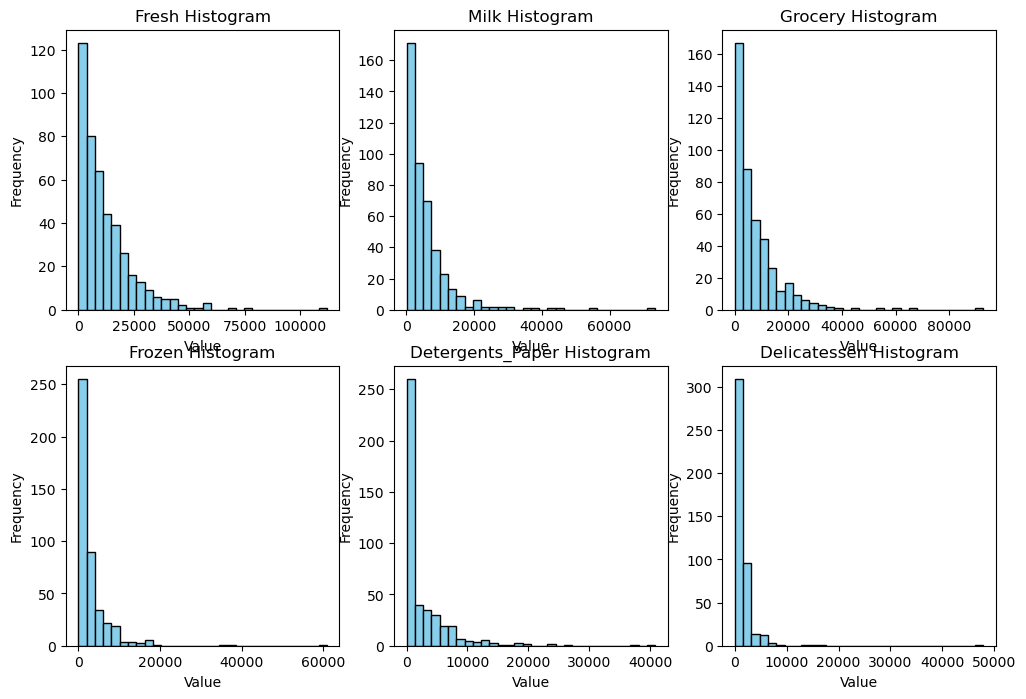

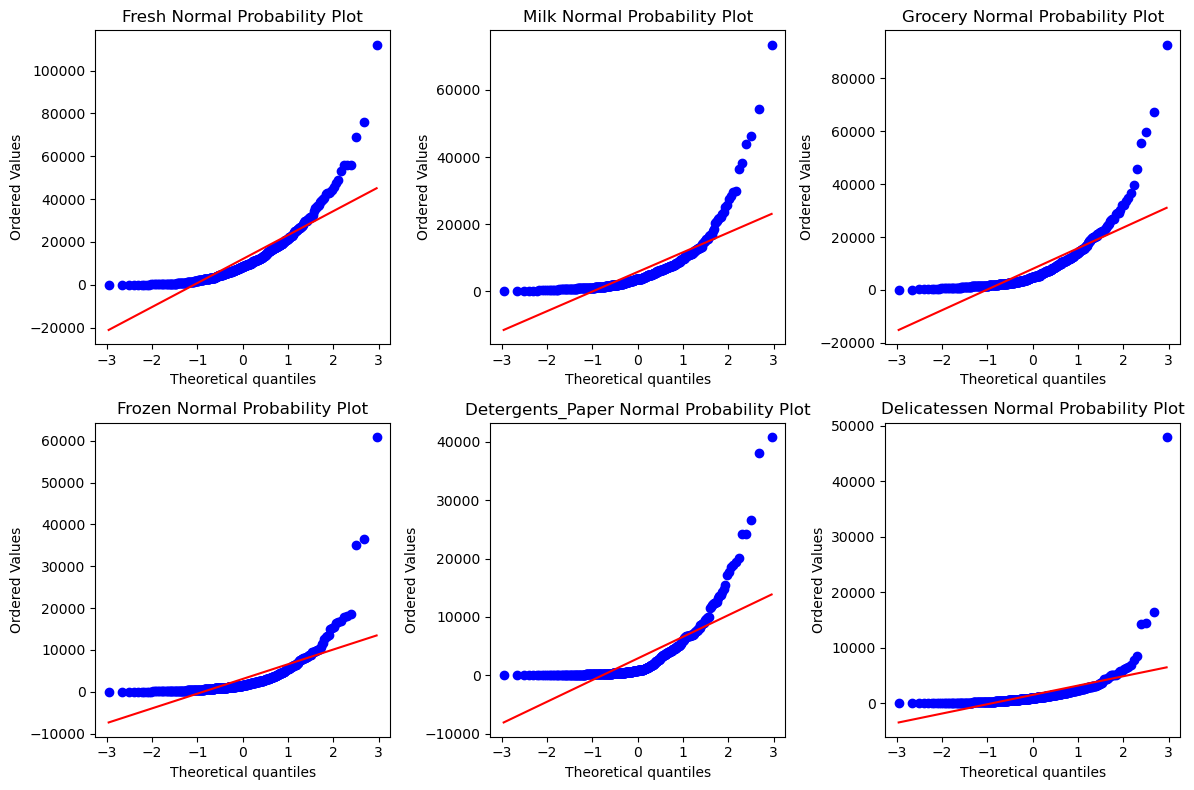

In [30]:
# write your code here
# Loop through columns and create plots
# 1.Plotting Histogram of each feature
plt.figure(figsize=(12,8))
for i,col in enumerate(wsdf.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(wsdf[col],bins=30,color='skyblue',edgecolor='black')
    plt.title(col+' Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
# 2. Plotting normal probability plot of each feature
plt.figure(figsize=(12,8))
for i, col in enumerate(wsdf.columns):
    plt.subplot(2,3,i+1)
    stats.probplot(wsdf[col], dist="norm", plot=plt)
    plt.title(col + " Normal Probability Plot")
plt.tight_layout()
plt.show()


5. What do you observe about distribution? (2 points)
